# Classifying movie reviews: A binary classification example

In this example, We’ll learn to classify movie reviews as
positive or negative, based on the text content of the reviews.

### Assignment:  The IMDB dataset
### Book:   Deep Learning with Python by François Chollet
### Submitted by:  Shafiq ur Rehman

## We’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)
#The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

## Here’s how you can quickly decode one of these reviews back to English words:

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

Let’s go with the latter solution to vectorize the data, which you’ll do manually for
maximum clarity.

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))#Creates an all-zero matrix of shape (len(sequences),dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 #Sets specific indices of results[i] to 1s
    return results
x_train = vectorize_sequences(train_data)#Vectorized training data
x_test = vectorize_sequences(test_data)#Vectorized test data

You should also vectorize your labels, which is straightforward:

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Now the data is ready to be fed into a neural network.

The input data is vectors, and the labels are scalars (1s and 0s)

## Neural Network

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model

In [8]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Sometimes you may want to configure the parameters of your optimizer or pass a cus-
tom loss function or metric function.

Configuring the optimizer

In [9]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

Using custom losses and metrics

In [10]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data.

Setting aside a validation set

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We’ll now train the model for 20 epochs (20 iterations over all samples in the
x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by
passing the validation data as the validation_data argument.

## Training your model

In [12]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5029 - acc: 0.7935 - val_loss: 0.4046 - val_acc: 0.8398
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2913 - acc: 0.9055 - val_loss: 0.3121 - val_acc: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2151 - acc: 0.9295 - val_loss: 0.2753 - val_acc: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1681 - acc: 0.9451 - val_loss: 0.3292 - val_acc: 0.8676
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1366 - acc: 0.9577 - val_loss: 0.2849 - val_acc: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1104 - acc: 0.9671 - val_loss: 0.3062 - val_acc: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0942 - acc: 0.9715 - val_loss: 0.3136 - val_acc: 0.8810
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0742 - a

Note that the call to model.fit() returns a History object. This object has a mem-
ber history , which is a dictionary containing data about everything that happened
during training. Let’s look at it:

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Plotting the training and validation loss

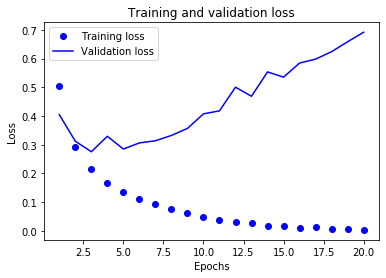

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') # “bo” is for “blue dot.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()